In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import random

In [2]:
def distance(p1, p2):
    '''
    Find the distance between points 
    p1 and p2
    '''
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

def magority_vote(votes):
    '''
    Finds the winner. If there is a tie among winners, the 
    program choose radomly
    '''
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

def find_nearest_neighbors(p, points, k = 5):
    '''
    Find the k nearest neighbors of point p and return their indices.
    '''
    distances = np.zeros(points.shape[0])
    #loop over all points
    for i in range(len(distances)):
        #compute the distance beetween point p and every other point
        distances[i] = distance(p, points[i])
    #sort distances and return those k points that are the nearest to point p
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k = 5):
    #find the k nearest neighbors
    ind = find_nearest_neighbors(p, points, k)
    #predict the class of p based on the majority votes
    return magority_vote(outcomes[ind])

def generate_syth_data(n = 50):
    '''
    Create two sets of points from bivariate normal distribution.
    '''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

def make_prediction_grid(predictors, outcomes,limits, h, k):
    '''
    Classify each point on the pridiction grid.
    '''
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)

    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [3]:
(predictors, outcomes) =  generate_syth_data()

In [4]:
predictors.shape

(100, 2)

In [5]:
outcomes.shape

(100,)

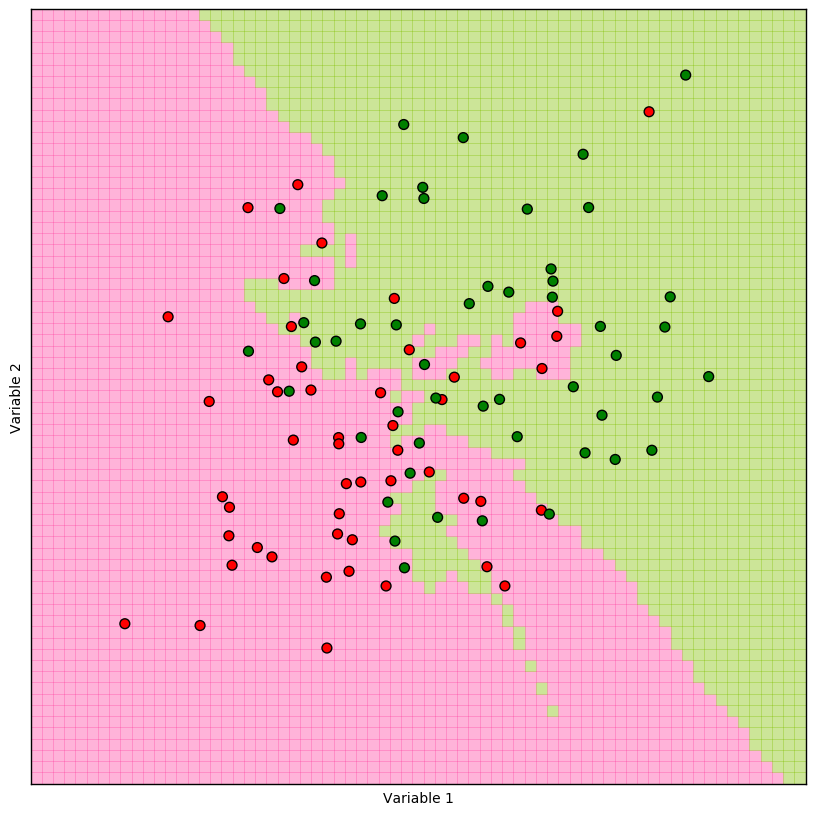

In [6]:
k = 5; filename = 'knn_syth_5.pdf'; limits = (-3, 4, -3 , 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

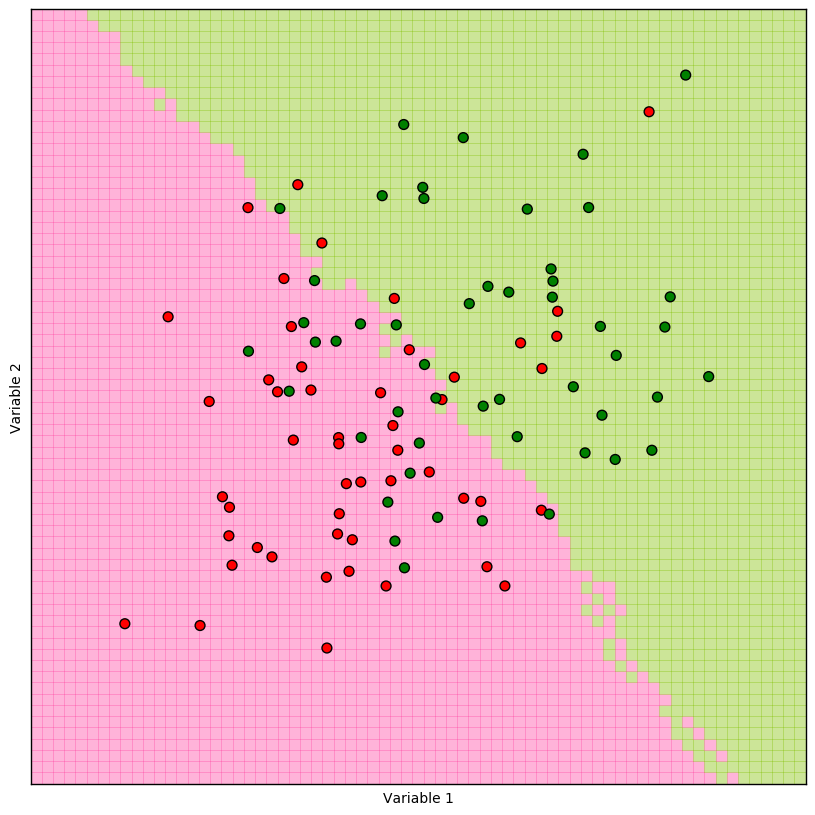

In [8]:
k = 50; filename = 'knn_syth_50.pdf'; limits = (-3, 4, -3 , 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()